In [1]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [2]:
# Train
with open("data/X_train_scaled.pickle", 'rb') as xtrain, open("data/y_train_scaled.pickle", 'rb') as ytrain:
    X_train, y_train = pickle.load(xtrain), pickle.load(ytrain)

# Test
with open("data/X_test_scaled.pickle", 'rb') as xtest, open("data/y_test_scaled.pickle", 'rb') as ytest:
    X_test, y_test = pickle.load(xtest), pickle.load(ytest)

## Helpers functions & variables

In [3]:
features = ['housing_median_age','total_rooms','total_bedrooms','median_income', 'population', 'ocean_proximity']

# Declares fews colors for later
c1 = sns.color_palette("deep")[2]
c2 = sns.color_palette("deep")[0]
c3 = sns.color_palette("deep")[3]

def plot_result(X, y, y_pred_):
    """
    Debug function to see model's predictions
    :param X: X true
    :param y: y true
    :param y_pred_: prediction of the model
    :return: subplots
    """
    fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)
    fig.tight_layout(pad=3.0)
    axes = axes.ravel()
    for i, feature in enumerate(features):
        axes[i].set_xlabel(feature, fontsize=16)
        sns.scatterplot(x=X[:, i], y=y[:, 0], label="y true", color=c1, alpha=1, ax=axes[i])
        sns.scatterplot(x=X[:, i], y=y_pred_, label="y pred", color=c2, alpha=.8, ax=axes[i])

# Implementations of differents algorithms:
- Linear
- Ridge
- Gradient Boosting

## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_train).reshape(-1)
print(f"R2 on train set:{reg.score(X_train, y_train)}")
print(f"R2 on test set:{reg.score(X_test, y_test)}")
print(f"MSE on train set:{mean_squared_error(y_train, y_pred)}")
print(f"MSE on test set:{mean_squared_error(y_test, reg.predict(X_test))}")

R2 on train set:0.5757289522887301
R2 on test set:0.5698364556574199
MSE on train set:0.02387491961420746
MSE on test set:0.025008037924364554


In [5]:
# Get a & b coeffients from the linear regression (ax + b)
A, B = reg.coef_[0], reg.intercept_[0]
A, B

(array([ 0.11708664, -5.23219307,  4.84811074,  1.49877881, -0.97028542,
        -0.14049505]),
 0.10436139252588333)

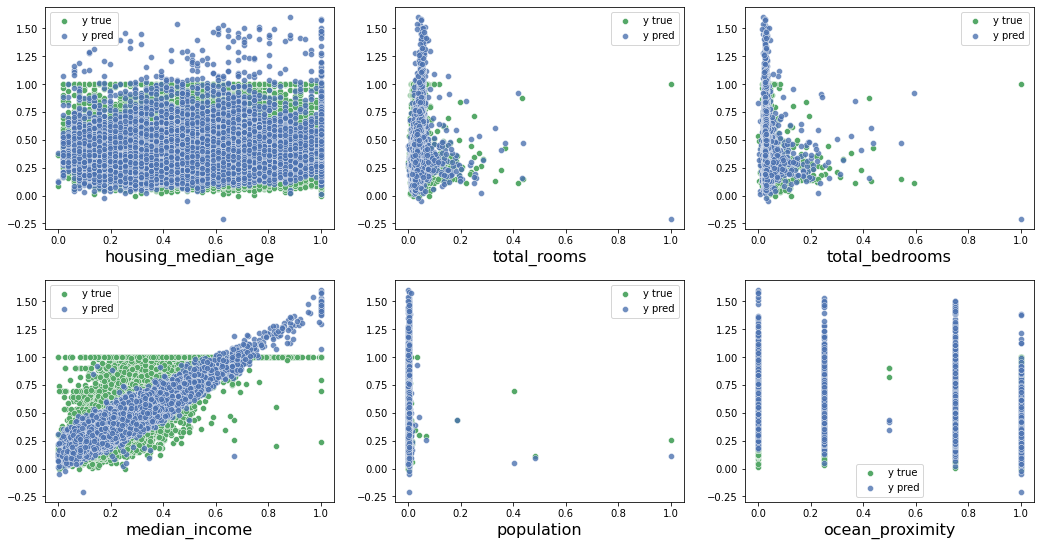

In [6]:
plot_result(X_train, y_train, y_pred)

## Ridge

In [7]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train, y_train)
y_pred = reg.predict(X_train).reshape(-1)
print(f"R2 on train set:{reg.score(X_train, y_train)}")
print(f"R2 on test set:{reg.score(X_test, y_test)}")
print(f"MSE on train set:{mean_squared_error(y_train, y_pred)}")
print(f"MSE on test set:{mean_squared_error(y_test, reg.predict(X_test))}")

R2 on train set:0.564536057222432
R2 on test set:0.5718433049338594
MSE on train set:0.024504775154432737
MSE on test set:0.024891367501048273


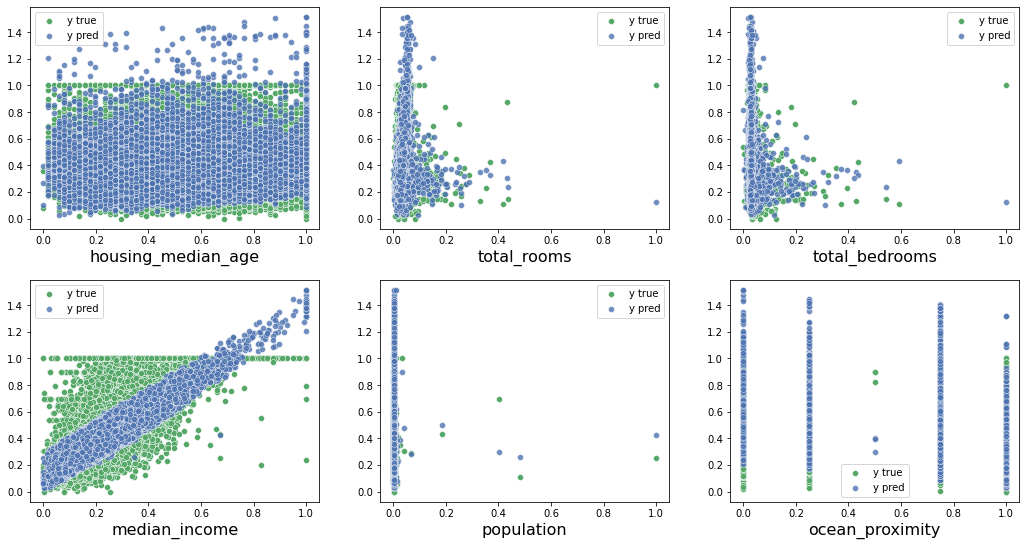

In [8]:
A, B = reg.coef_[0], reg.intercept_[0]
plot_result(X_train, y_train, y_pred)

## GBRegressor

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor().fit(X_train, y_train.reshape(-1))
y_pred = reg.predict(X_train)
print(f"R2 on train set:{reg.score(X_train, y_train)}")
print(f"R2 on test set:{reg.score(X_test, y_test)}")
print(f"MSE on train set:{mean_squared_error(y_train, y_pred)}")
print(f"MSE on test set:{mean_squared_error(y_test, reg.predict(X_test))}")

R2 on train set:0.750647697394956
R2 on test set:0.7230450785381312
MSE on train set:0.014031752136818796
MSE on test set:0.016101083577045087


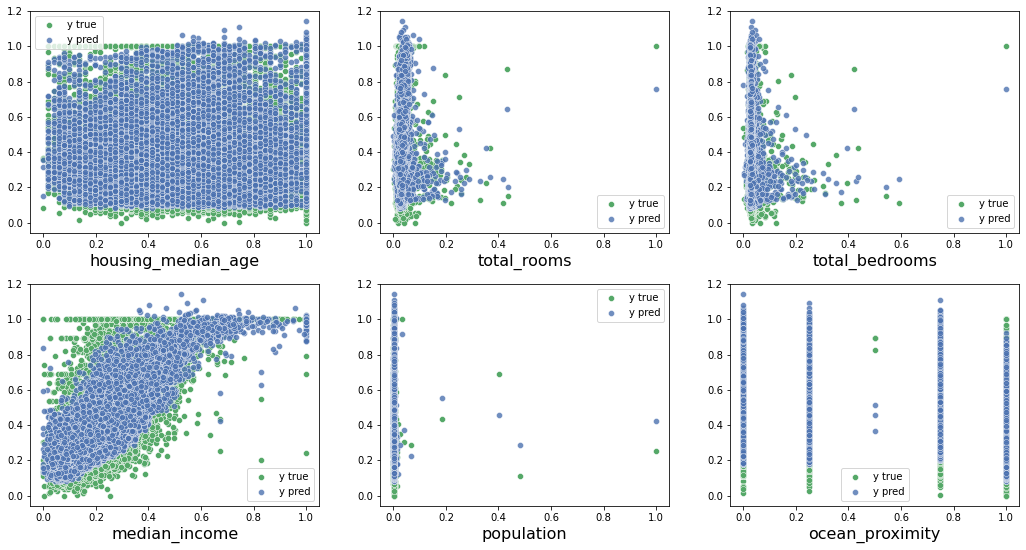

In [10]:
plot_result(X_train, y_train, y_pred)

In [11]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    "learning_rate": np.linspace(.0001, .1, 5),
    "n_estimators": np.linspace(50, 300, 5).astype(int),
    "max_depth": np.arange(2, 15, 2)
}

grid_search = GridSearchCV(GradientBoostingRegressor(), params_grid, cv=3, n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train.reshape(-1))

Fitting 3 folds for each of 175 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.0001  , 0.025075, 0.05005 , 0.075025, 0.1     ]),
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([ 50, 112, 175, 237, 300])},
             verbose=10)

In [12]:
grid_search.best_params_

{'learning_rate': 0.025075, 'max_depth': 6, 'n_estimators': 300}

In [13]:
grid_search.best_score_

0.7378043278313141

In [14]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape, y.shape

((20433, 6), (20433, 1))

In [15]:
regr = GradientBoostingRegressor(learning_rate=.025075, max_depth=6, n_estimators=300)
regr.fit(X, y.reshape(-1))

GradientBoostingRegressor(learning_rate=0.025075, max_depth=6, n_estimators=300)

In [16]:
with open('data/ML_GBoosting_model.pickle', 'wb') as handle:
    pickle.dump(regr, handle, protocol=pickle.HIGHEST_PROTOCOL)